### 목표
- 타이타닉 데이터를 활용하여 생존자/사망자 예측해보자,
- kaggle 경진대회에 참가하여 우리 점수를 확인해보자.
- machine learning의 전체 과정을 ㅊㅔ험해보자.

#### 머신러닝 과정
 - 1. 문제 정의 : 목표설정, 어떤 모델
 - 2. 데이터 수집: 분류를 할거라면 class로 담긴 레이블이 있는 데이터 수집 같은
 - 3. 데이터 전처리 :이상치/결측치 처리. 특성 처리(특성 공학)
 - 4. 데이터 탐색(탐색적 데이터 분석) : 기술통계, 특성 간의 관계
 - 5. 모델 선택 및 하이퍼 파라미터 설정 : 
 - 6. 모델 예측 및 평가
 - 7. 모델 서비스화 

-train - 학습용 문제, 답
-test - 테스트용 문제, ( 답은 kaggle이 가지고 있음)
# pre 잘했는지 평가하기 위해서 kaggle에 업로드
-submission : 답안지임.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns  # 시각화 라이브러리
# train, test 분리하는 도구
from sklearn.model_selection import train_test_split
# 평가 도구
from sklearn.metrics import accuracy_score
#트리 모델 - 사망/생존 이진 분류
from sklearn.tree import DecisionTreeClassifier

-  0   Survived  - 생존/ 사망 여부 (답 데이터, Class Label)
- 1   Pclass    - 승객의 등급(1- 귀족층,2- 중간층,3- 하위계층)
- 2   Name      - 이름      
- 3   Sex       - 성별(male, female)
- 4   Age       - 나이(0~
- 5   SibSp     - 형제자매+배우자 수
- 6   Parch     - 부모 + 자식 수
- 7   Ticket    - 티겟 번호
- 8   Fare      - 요금
- 9   Cabin     - 객실번호
- 10  Embarked  - 승선항

In [2]:
# 각각 train. test 변수에 데이터 불러와서 담기
# 단, index를 승객의 번호로 설정해서 담아줄 것.
train = pd.read_csv("./data/titanic/train.csv", index_col= "PassengerId" )
test=pd.read_csv("./data/titanic/test.csv" , index_col= "PassengerId")
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# 크기 확인
print('트레인 크기: ', train.shape)
print('테스트 크기: ', test.shape) # test 정답 데이터 x (1개가 없음.) => kaggle이 알고 있다.

트레인 크기:  (891, 11)
테스트 크기:  (418, 10)


In [5]:
# 컬럼명만 뽑아서 확인하기
print(train.columns)
print(test.columns)

# 컬럼의 순서도 중요.

# 컬럼명도 동일해야함.

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


### 데이터 전처리 및 데이터 탐색
#### 결측치 확인

In [6]:
# pandas함수 통해서 train결측치 확인
# 데이터 자리에 결측치가 있는지? 
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# info 함수 통해서 train 결측치 확인
train.info()
# 결측치 존재 컬럼 : age, cabin, embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
# info 함수 통해서 test 결측치 확인
test.info()
# 결측치 존재 컬럼 : age, cabin, fare

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## 결측치(행)에 데이터를 채워넣기.( 삭제도 가능하지만 여기서는 데이터를 채워넣음. )
- train 의 embarked 결측치 처리
-  : 승객이 탑승한 항구 이름

In [9]:
# train데이터 기준으로 embarked 컬럼 확인
train['Embarked']

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 891, dtype: object

In [10]:
# train데이터 기준으로 embarked 컬럼 확인
# nan => 결측치
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
# 빈도수가 높은 승선항 알파벳으로 결측치를 처리해보자.
train['Embarked'].value_counts()
# S가 가장 많으니까 S로 채우자.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# 탐색용 데이터는 train.
# 모델 학습 : 모델이 학습을 잘할 수 있도록 데이터를 셋팅해야함.
# test 데이터는 모델을 일반화시키는데 도움이 되지 않는다.
# train 데이터가 학습할 때 사용되고 모델의 일반화에 도움을 줌.

In [13]:
# train의 Embarked 결측치를 'S로 채우기
# fillna('채울값')
train['Embarked']=train['Embarked'].fillna('S')
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 추가 ) Embarked 컬럼에 결측치가 있던 행의 정보를 확인하고
### 비슷한 사람의 데이터가 있다면 그 사람의 승선항 정보를 대체값으로 활용.

#### - test데이터의 Fare결측치 처리
##### - 요금평균, 중앙값 계산 가능.
##### - 데이터 분석을 진행하면서 관련이 있을법 한 컬럼을 연관지어서 대체값을 확인해보자.

In [14]:
# train 기준으로 데이터 탐색한다.
# Fare 컬럼 정보 확인 -> 기술 통계량.
train['Fare'].describe()
#  요금의 대표값으로 평균보다 중앙이 더 나을 수 있겠음.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
# 변수(특성)간의 상관관계 확인
# 상관계수(숫자): -1 ~ 1
# 각 컬럼의 상관 정도를 수치로 표현한 값 : 상관계수
# -1과 1에 가까울 수록 변수간의 관계성이 있음.
# 0에 가까울 수록 변수간의 관계성이 적음.
# 생존 사망과 연관이 있는 컬럼 확인해보기.
train.corr()

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_20444\1697463998.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
#  절대값으로 보여짐.
train.corr()['Survived'].abs() #pclass가 생존/사망과 연관성이 있을 수 있겠음.
# 따라서 등급에 따른 요금의 중앙값으로 채워주는 것도 의미가 있을거라 생각됨.(강사님)


C:\Users\gjaischool\AppData\Local\Temp\ipykernel_20444\1591755502.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()['Survived'].abs() #pclass가 생존/사망과 연관성이 있을 수 있겠음.


Survived    1.000000
Pclass      0.338481
Age         0.077221
SibSp       0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [17]:
# 등급에 따른 요금의 중앙값.
# 1. Pclass, Fare 2개 컬럼만 인덱싱 해보기
train[['Pclass','Fare']].groupby('Pclass').median()

# 2. Pclass 1,2,3 등급끼리 묶기(그룹화하기)

# 3. median() 집계함수 연결

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [18]:
train[['Pclass']]

,Pclass
PassengerId,
1,3
2,1
3,3
4,1
5,3
...,...
887,2
888,1
889,3


In [19]:
test['Fare']

PassengerId
892       7.8292
893       7.0000
894       9.6875
895       8.6625
896      12.2875
          ...   
1305      8.0500
1306    108.9000
1307      7.2500
1308      8.0500
1309     22.3583
Name: Fare, Length: 418, dtype: float64

In [20]:
## 09월 01일 금요일  ---------------------------------------------------
# test - Fare컬럼에 결측치가 있는 행 정보 출력하기.
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
#fillna()
# Fare 결측치 채워보기( Pclas의 3등급 사람들에게 결측치가 있음)
# 3등급-> 8.0500
test['Fare'] = test['Fare'].fillna(8.0500)
test[test['Fare'].isnull()] # 아무것도 출력되지 않으면 잘 처리 된 것임.!

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


#### Age 컬럼 결측치 채우기
- 단순 기술 통계로만 채우지 않고, 다른 컬럼과의 상관관계를 이용해서 결측치를 채워보는 방향으로 진행해보자.
- Pclass, Sex와 연관지어서 나이통계 확인해보자.

In [22]:
# train age컬럼 접근해서 기술 통계량 확인하기
train['Age'].describe()
#  가장 어린 나이가 0살, 가장 나이가 많은 사람이 80살.
# 평균, 중앙값의 큰 차이가 없음.`
# 평균치로 데이터를 처리해보자.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
# 1등급의 여성의 나이의 평균
# 1등급의 남성의 나이 평균
# 2등급의 여성 나이의 평균
# 2등급의 남성 나이의 평균
# 3등급의 여성 나이의 평균
# 3등급의 남성 나이의 평균
# train.loc[:,['Pclass','Sex','Age']]
gb1 = train[['Pclass','Sex','Age']].groupby(['Pclass','Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [24]:
# gb1 
# 인덱스가 2개 => 멀티 인덱스(중복 인덱스) (=> 'Pclass', 'Sex')
# 3등급 female 평균 나이 데이터 접근해보기
#gb1.loc[(승객 등급, 성별)]
gb1.loc[(3,'female')]

Age    21.75
Name: (3, female), dtype: float64

In [25]:
# 1등급 male평균 나이 접근해보기
gb1.loc[(1,'male')]

Age    41.281386
Name: (1, male), dtype: float64

In [26]:
# train, test 결측치
# train Age컬럼의 결측치가 있는 행 정보 출력해보기
# 1. Age 접근
# 2. null 확인
# 3. 불리언 인덱싱 적용 -> 행정보 출력됨.
train['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
train['Age'].isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [28]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [29]:
# 복잡한 처리를 해줄 수 있는 도구가 있나?
# 사용자 정의 함수 생성 필요 : Pclass, Sex을 확인해서 gb1에 있는 평균 나이로 대체.
# 이 기능이랑 pandas 데이터랑 연결 - > apply()
# train[ ['Pclass','Sex']].apply(사용자함수, axis=0)

def test_def(data):
    print(data['Pclass'],data['Sex'])
    
train[ ['Pclass','Sex']].apply(test_def, axis=1)

3 male
1 female
3 female
1 female
3 male
3 male
1 male
3 male
3 female
2 female
3 female
1 female
3 male
3 male
3 female
2 female
3 male
2 male
3 female
3 female
2 male
2 male
3 female
1 male
3 female
3 female
3 male
1 male
3 female
3 male
1 male
1 female
3 female
2 male
1 male
1 male
3 male
3 male
3 female
3 female
3 female
2 female
3 male
2 female
3 female
3 male
3 male
3 female
3 male
3 female
3 male
3 male
1 female
2 female
1 male
1 male
2 female
3 male
2 female
3 male
3 male
1 female
1 male
3 male
1 male
3 male
2 female
3 male
3 female
3 male
2 male
3 female
2 male
3 male
3 male
3 male
3 male
3 male
2 male
3 female
3 male
3 male
3 female
1 male
2 female
3 female
3 male
3 male
1 female
3 male
3 male
3 male
1 male
3 male
3 male
3 male
1 male
1 male
2 female
2 male
3 female
3 male
1 male
3 male
3 male
3 male
3 female
3 male
3 male
3 female
1 male
3 female
3 male
3 female
3 female
3 male
3 male
2 male
1 male
3 female
2 male
3 male
2 male
2 female
1 male
3 male
3 male
3 male
3 female
3

PassengerId
1      None
2      None
3      None
4      None
5      None
       ... 
887    None
888    None
889    None
890    None
891    None
Length: 891, dtype: object

In [30]:
def test_def(data):
    print(data)
train.apply(test_def, axis=1)  
# axis= 1 은 한 사람에 대한 정보가 처리 단위로 연결됨.

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object
Survived                                                    1
Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                      38.0
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17599
Fare                                                  71.2833
Cabin                  

Survived                               0
Pclass                                 3
Name        Ibrahim Shawah, Mr. Yousseff
Sex                                 male
Age                                 30.0
SibSp                                  0
Parch                                  0
Ticket                              2685
Fare                              7.2292
Cabin                                NaN
Embarked                               C
Name: 799, dtype: object
Survived                                                    0
Pclass                                                      3
Name        Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...
Sex                                                    female
Age                                                      30.0
SibSp                                                       1
Parch                                                       1
Ticket                                                 345773
Fare                        

PassengerId
1      None
2      None
3      None
4      None
5      None
       ... 
887    None
888    None
889    None
890    None
891    None
Length: 891, dtype: object

In [31]:
train[ ['Pclass','Sex']]

,Pclass,Sex
PassengerId,,
1,3,male
2,1,female
3,3,female
4,1,female
5,3,male
...,...,...
887,2,male
888,1,female
889,3,female


In [32]:
# 추가적으로 이해하는 코드
# numpy에서 null값을 확인하는 함수
# Nan 
a = np.array([1,2,np.nan])
np.isnan(a[2])

True

In [33]:
# dtype :object  => 여러타입의 데이터가 함께 있으면 object임.
def fill_age(data):
    # 만약 나이가 결측치라면 gb1에서 대체할 값을 가져오고 반환
    if np.isnan(data['Age']):
        gb1_age = gb1.loc[(data['Pclass'],data['Sex'])]
        return gb1_age
    else:
        return data['Age']
    # 결측치가 x 원래 나이 값을 반환.
# astype('int64') => integer로 맞춰짐.
    
train['Age'] = train.apply(fill_age,axis=1).astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [34]:
# test Age컬럼 결측치 처리하기
# test결측치를 채울 때, train(모델의 일반화 도움을 주는) 데이터를 기준으로 채워줌.
test['Age'] = test.apply(fill_age,axis=1).astype('int64')
test['Age'].isnull().sum()


0

### cabin 컬럼 결측치 채우기

In [35]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
# train Cabin 컬럼 접근해보기

In [37]:
# 'M' 임의로 Cabin 결측치를 채워보기
# train, test
# fillna
train['Cabin'] =train['Cabin'].fillna('M')
test['Cabin'].fillna('M', inplace =True)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non

In [38]:
# train Cabin 접근해서 살펴보기
train['Cabin'][2][0]
# 판다스.str 해당 컬럼에 문자열 자료에 접근하는 키워드
train['Deck']=train['Cabin'].str[0] #Deck 이라는 새로운 컬럼명 생성하여 저장
# test도 실행해보기
test['Deck']=test['Cabin'].str[0] 

In [39]:
# cabin컬럼 삭제하기 : df.drop(['대상','대상'])
# axis=1 열의 방향. axis=0 행의방향
# train, test
# 삭제 2번 하면 오류가 남.
train =train.drop('Cabin',axis=1)
test.drop('Cabin', axis=1, inplace =True)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 115.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 no

#### 데이터 탐색
- train 데이터를 이용해서 탐색 진행함.
- test를 탐색하는 것은 모델의 일반화에 도움 안됨.
- Deck 컬럼이 생존/사망과 얼마나 연관이 있는지 확인해보기

<Axes: xlabel='Deck', ylabel='count'>

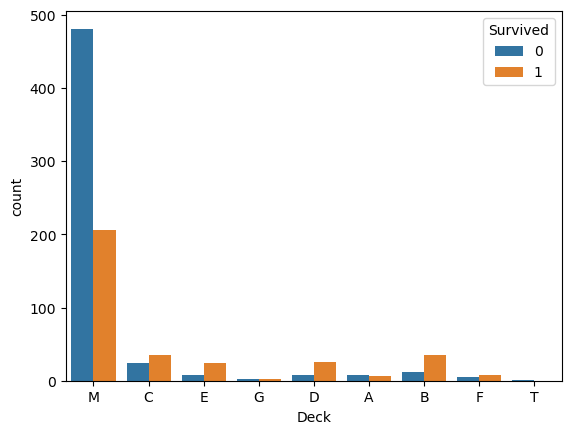

In [40]:
# 시각화
# x - Deck, y - Survived
# hue 가 y 축임.
sns.countplot(data = train, x='Deck', hue ='Survived')

- M에서 상대적으로 사망자 수 多
- Pclass와 Survived 컬럼의 관계확인 필요( 생존/사망과 연관 유무)

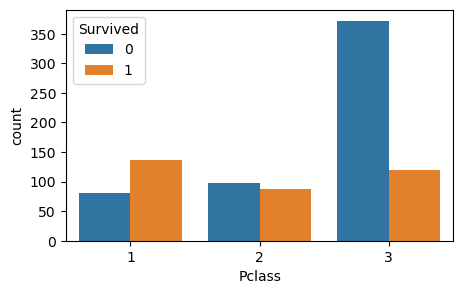

In [41]:
plt.figure(figsize=(5,3))
sns.countplot(data=train, x='Pclass', hue ='Survived')
plt.show()

- 승객의 등급이 높을 수 록 비교적 생존율 높음.
- 3등급의 승객들 중에서 사망자 多
- Deck 와 Pclass 시각화


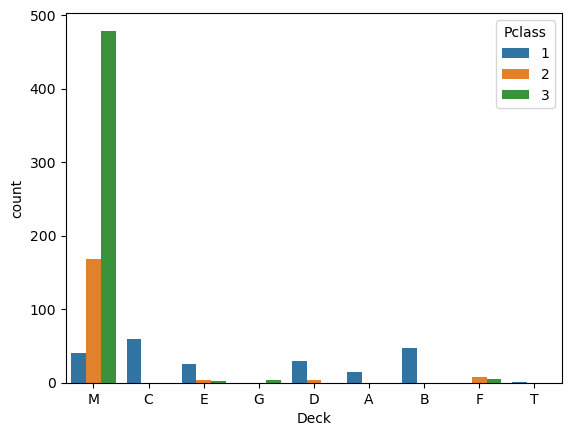

In [42]:
sns.countplot(data = train, x='Deck', hue='Pclass')
plt.show()

- M(결측치)안에는 3등급의 사람들이 많아서 사망율이 높게 출력됨.
- Sex와 Survived 관계 확인해보기

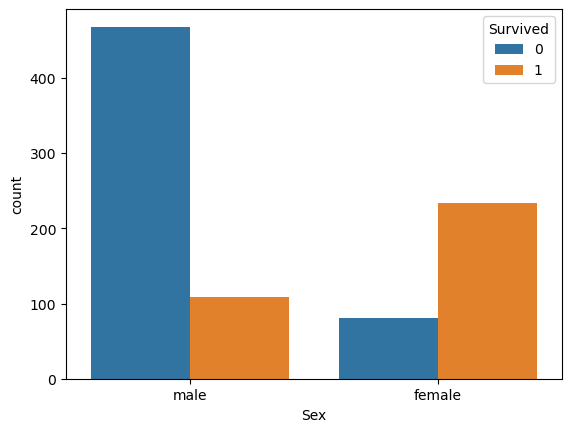

In [43]:
sns.countplot(data = train, x='Sex', hue='Survived')
plt.show()

- male 사망율이 높음, female 비교적 생존율이 높음.

- Embarked와 Survived 관계 확인해보기

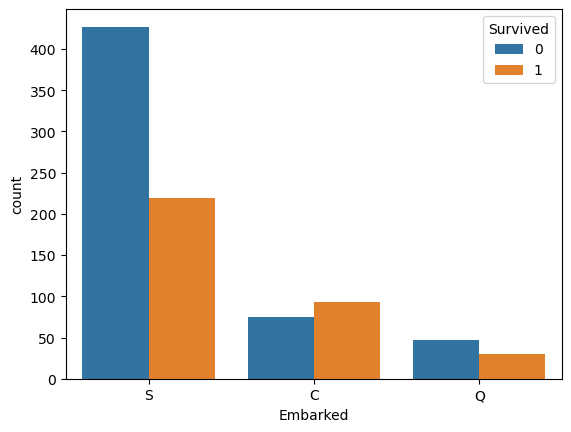

In [44]:
sns.countplot(data = train, x='Embarked', hue='Survived')
plt.show()

- Embarked와 Pclass관계 확인

- Age에 따른 생존/ 사망 시각화
  - 데이터의 분포를 확인할 때 여러가지 시각화 방법을 활용하는데, 그 중에 하나인 바이올린 플롯을 활용


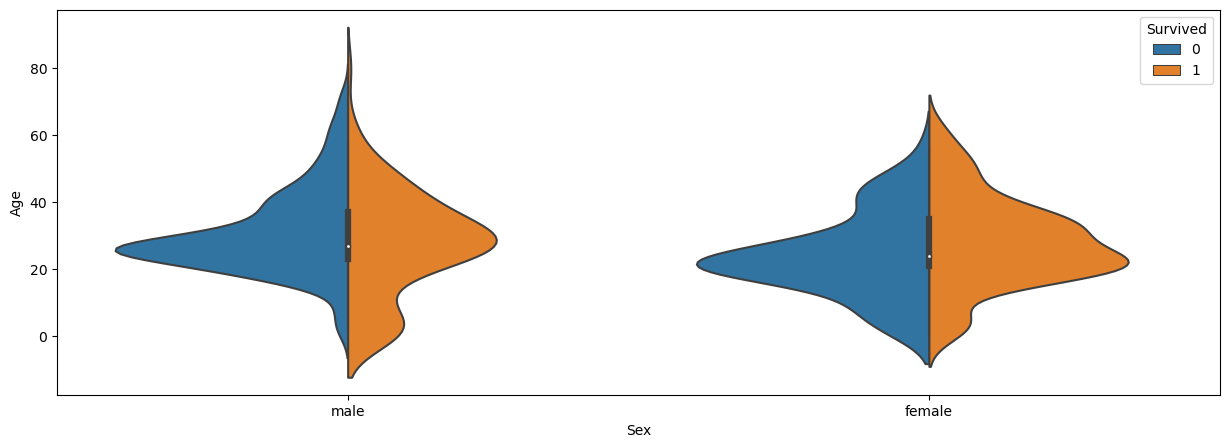

In [45]:
plt.figure(figsize=(15,5))  # x축 : 15, y축 : 5
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived', split =True)
# 중심을 기준으로  양쪽이 같기에, 한쪽면만 봄.
plt.show()

- 중앙의 선을 기준으로 왼쪽은 사망, 오른쪽은 생존자의 수
- 20~40대 사이에 사망 多
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존했음.
- fare(요금)에 따른 생존/사망 시각화 해보기.


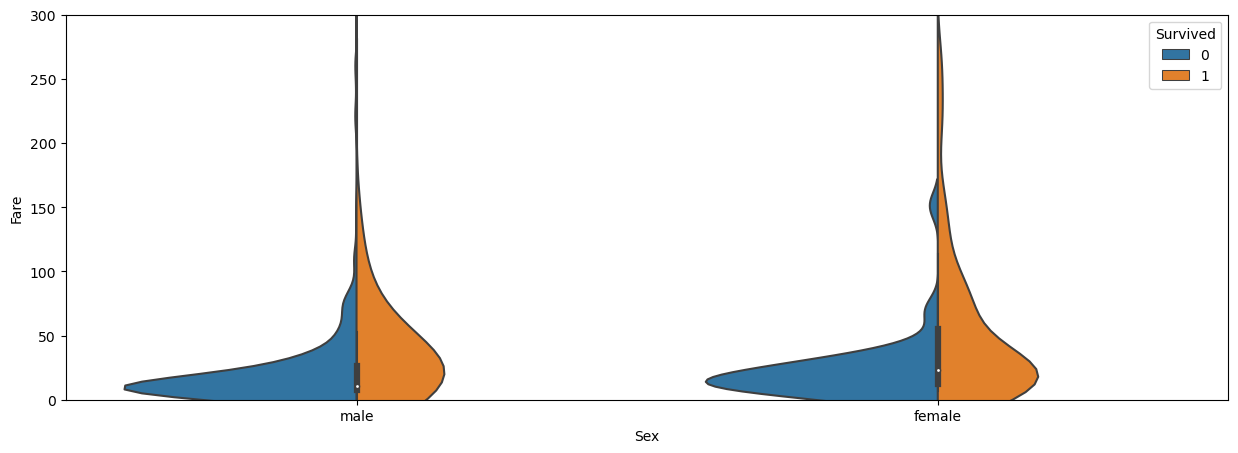

In [46]:
plt.figure(figsize=(15,5))  # x축 : 15, y축 : 5
sns.violinplot(data=train, x='Sex', y='Fare', hue='Survived', split =True)
# 중심을 기준으로  양쪽이 같기에, 한쪽면만 봄.
# 0 ~ 300사이로 y 축 범위 제한.
plt.ylim(0,300)
plt.show()

- 요금이 저렴한 사람은 상대적으로 많이 사망함.

In [47]:
# Fare 기술 통계량 확인
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### 가족의 수 컬럼 생성
 - 기존의 의미를 가지고 새로운 컬럼을 생성( 특성 공학의 분야 중 하나)
 - 가족의 수 : Sibsp( 형제자매, 배우자) , Parch(부모, 자식) +1(자신)
 - train, test 컬럼 모두 생성 진행

In [48]:
# Sibsp + Parch +1 => Family_SIze 컬럼 추가
# train, test
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
train['Family_Size']
# 결과가 1이면 혼자 탑승한 것!.

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int64

In [49]:
# test에 Family_Size 컬럼 생성
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1
test['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int64

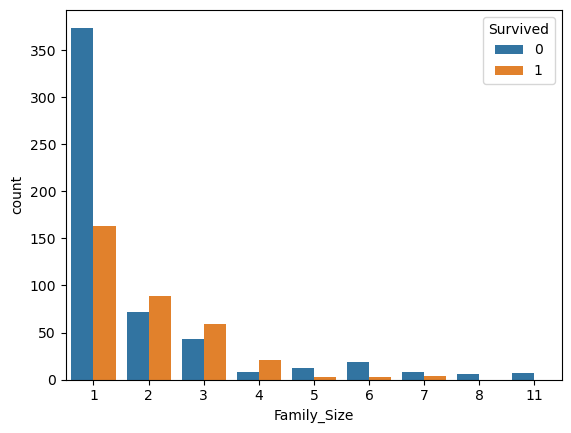

In [50]:
# 가족의 수 컬럼을 이용해서 생존/ 사망 시각화
sns.countplot(data=train, x= 'Family_Size', hue='Survived')
plt.show()

#  1명 일때는사망 비율이 높고, 2~4명일 때는 생존 비율이 높고, 
5명이상이면 사망 비율이 더 높음.
- 사소한 관찰의 오류를 줄이기 위해서 범주를 줄여준다.(binning)

### 가족의 수가 1이면 ALONE, 2~4명일 때는 SMALL, 5명 이상이면 LARGE


# 연속적인수치값을범주화(카테고리 화) 사용하는 PANDAS 함수: PD.CUT()
- 범위( 구간 ) :bins 설정



In [51]:
user_bins= [0,1,4,11]
# 0~ 1이면 => 1이다.
# 1,4 => 1,2,3
user_labels=['Alone','Small','Large']
train['Family_Group'] = pd.cut(train['Family_Size'], bins = user_bins, labels=user_labels)
train['Family_Group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_Group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [52]:
test['Family_Group'] = pd.cut(test['Family_Size'], bins = user_bins, labels=user_labels)
test['Family_Group']

PassengerId
892     Alone
893     Small
894     Alone
895     Alone
896     Small
        ...  
1305    Alone
1306    Alone
1307    Alone
1308    Alone
1309    Small
Name: Family_Group, Length: 418, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

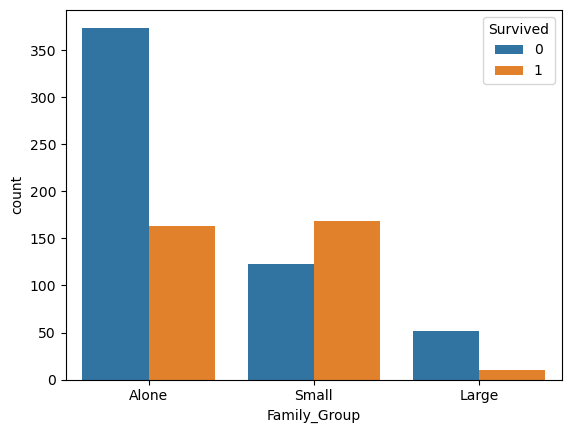

In [53]:
sns.countplot(data=train, x= 'Family_Group', hue='Survived')
plt.show()

#### 불필요한 컬럼 삭제
##### 컬럼은 옆으로 나열 되어있으니까  
 - drop(), 삭제할 이름이 있는 방향으로 axis=1로 설정.
 - 전처리 대상에서 제외되거나 전처리 후 불필요한 컬럼 삭제
 - Ticket, Name, Family_Size 삭제
 - train, test 삭제

In [54]:
train = train.drop(columns=['Ticket','Name','Family_Size'],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 102.9+ KB


In [55]:
test = test.drop(columns=['Ticket','Name','Family_Size'],axis=1)  # inplace=True하면 됨. 
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   SibSp         418 non-null    int64   
 4   Parch         418 non-null    int64   
 5   Fare          418 non-null    float64 
 6   Embarked      418 non-null    object  
 7   Deck          418 non-null    object  
 8   Family_Group  418 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 29.9+ KB


In [56]:
# 훈련문제. 훈련 답
x_train= train.drop('Survived', axis =1)   
y_train= train ['Survived']

# 테스트 문제
x_test= test

In [57]:
#  범주형 -> 수치형으로 인코딩해야함. ( 원 핫 인코딩 )
# 인코딩 필요한 컬럼 찾기
# 데이터의 타입에 대한 질문으로 불리언 인덱싱 활용해보기
cat_filter = (x_train.dtypes !='int64') & (x_train.dtypes !='float64')
cat_choice = x_train.columns [cat_filter]
cat_choice

Index(['Sex', 'Embarked', 'Deck', 'Family_Group'], dtype='object')

In [58]:
x_train[cat_choice]

,Sex,Embarked,Deck,Family_Group
PassengerId,,,,
1,male,S,M,Small
2,female,C,C,Small
3,female,S,M,Alone
4,female,S,C,Small
5,male,S,M,Alone
...,...,...,...,...
887,male,S,M,Alone
888,female,S,B,Alone
889,female,S,M,Small


In [59]:
# 원핫인코딩 함수 -> pd.get_dummies(대상)
x_train_ch_oh = pd.get_dummies(x_train[cat_choice])
x_train_ch_oh 
x_test_ch_oh = pd.get_dummies(x_test[cat_choice])
x_test_ch_oh 

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large
PassengerId,,,,,,,,,,,,,,,,
892,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
893,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
894,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
895,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
896,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1306,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1307,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [60]:
# x_train과 원핫인코딩 데이터 합치기(병합하기)
x_train = pd.concat([x_train, x_train_ch_oh], axis=1)
x_test = pd.concat([x_test, x_test_ch_oh], axis=1)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_Group,Sex_female,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,male,22,1,0,7.2500,S,M,Small,0,...,0,0,0,0,0,1,0,0,1,0
2,1,female,38,1,0,71.2833,C,C,Small,1,...,1,0,0,0,0,0,0,0,1,0
3,3,female,26,0,0,7.9250,S,M,Alone,1,...,0,0,0,0,0,1,0,1,0,0
4,1,female,35,1,0,53.1000,S,C,Small,1,...,1,0,0,0,0,0,0,0,1,0
5,3,male,35,0,0,8.0500,S,M,Alone,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,male,27,0,0,13.0000,S,M,Alone,0,...,0,0,0,0,0,1,0,1,0,0
888,1,female,19,0,0,30.0000,S,B,Alone,1,...,0,0,0,0,0,0,0,1,0,0
889,3,female,21,1,2,23.4500,S,M,Small,1,...,0,0,0,0,0,1,0,0,1,0


In [61]:
# cat_choice 컬럼 삭제하기
x_train.drop(cat_choice, axis=1, inplace=True)
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,1,38,1,0,71.2833,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,3,26,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,1,35,1,0,53.1000,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
5,3,35,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
888,1,19,0,0,30.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
889,3,21,1,2,23.4500,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [62]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,1,38,1,0,71.2833,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,3,26,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,1,35,1,0,53.1000,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
5,3,35,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,0,0,13.0000,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
888,1,19,0,0,30.0000,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
889,3,21,1,2,23.4500,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [63]:
x_test.drop(cat_choice, axis=1, inplace=True)
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
893,3,47,1,0,7.0000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
894,2,62,0,0,9.6875,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
895,3,27,0,0,8.6625,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
896,3,22,1,1,12.2875,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1306,1,39,0,0,108.9000,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1307,3,38,0,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [64]:
x_train.shape, x_test.shape

((891, 22), (418, 21))

In [65]:
# set() 자료형
# 집합
# 합집합. 차집합. 교집합
# 중복 x, 순서 x
# 중복을 허용하지 않는 set 특징은 자료형의 중복을 제거하기 위한 필터 역할로 종종 사용됨
# 요소의 여부를 확인하기 위해서도 종종 사용 됨.
# 인덱싱으로 데이터에 접근하기 위해서는 리스트나 튜플로 형변환해서 사용해야한다.
set(x_train.columns) - set(x_test.columns)
# x_train에만 deck_t 가지고 있음.

{'Deck_T'}

In [66]:
# 인덱싱하려면 list로 해야함.
list(set(x_train.columns))

['Embarked_S',
 'Deck_E',
 'Parch',
 'Deck_G',
 'Family_Group_Large',
 'Deck_M',
 'Family_Group_Alone',
 'SibSp',
 'Age',
 'Fare',
 'Sex_male',
 'Deck_C',
 'Sex_female',
 'Deck_B',
 'Deck_T',
 'Pclass',
 'Deck_A',
 'Embarked_Q',
 'Family_Group_Small',
 'Embarked_C',
 'Deck_F',
 'Deck_D']

In [67]:
x_train['Deck_T']

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    0
890    0
891    0
Name: Deck_T, Length: 891, dtype: uint8

In [68]:
# 'Deck_T'에 0으로 채우겠다.
x_test['Deck_T'] = 0
x_test.shape

(418, 22)

In [69]:
display(x_train.columns)
display(x_test.columns)
# x_test 컬럼 순서를 x_train 컬럼 순서대로 맞추기
x_test = x_test[x_train.columns]

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large'],
      dtype='object')

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Group_Alone',
       'Family_Group_Small', 'Family_Group_Large', 'Deck_T'],
      dtype='object')

#### 모델링
 - 모델 선택 및 하이퍼 파라미터로 정의
 - 모델 학습
 - 모델 예측 및 평가

In [70]:
# tree 분류
tree_model = DecisionTreeClassifier( )
# 매개변수 random_state때문에 실행할 떄마다 모델의 학습 결과가 미묘하게 변경 될 수도 있음.

In [71]:
# 학습
# 모델.fit(훈련문제, 훈련 답)
tree_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [72]:
# 예측 후, pred변수에 담기.
# pred = 모델.predict()
pred = tree_model.predict(x_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# 정확도 점수 확인하기 위해서 kaggle제출
# 답안지 파일 불러오기
sub =pd.read_csv('./data/titanic/gender_submission.csv')
sub['Sur###vived'] =pred
# index는 저장하지 않음.
sub.to_csv('sbg_submission01.csv',index=False)

In [74]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
# tree_model : 모델 깊이 조정( 하이퍼 파라미터 튜닝 과정 ) 
tree_model = DecisionTreeClassifier(max_depth= 5)
from sklearn.model_selection import cross_val_score
result =  cross_val_score(tree_model, x_train, y_train, cv =5)
print(result.mean())

# 추후 max_depth, min_samples_split, max_leaf_nodes, min_samples_leaf
# 어떤 파라미터 값의 조합이 좋을지 찾아주는 방법을 연결해볼 수 있음.( => 그리드서치 )
# max_depth : 5라고 설정한 모델의 예측값 kaggle에 업로드하고 마무리!

tree_model.fit(x_train,y_train)
pred = tree_model.predict(x_test)
sub =pd.read_csv('./data/titanic/gender_submission.csv')
sub['Survived'] =pred
# index는 저장하지 않음.
sub.to_csv('sbg_submission02.csv',index=False)

0.8092021844203126


### 자료 내보내기
 - 분석에 사용한 파일(x_train, y_train, x_test) csv파일로 내보내기
 - 새로운 모델에 적용하기 위해

In [76]:
x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)